### 기초 환경 설정
- pyplot.rcParams 를 이요행 폰트 설정 및 그래프 크기 설정
 - rcParams['font.family'] : 폰트 설정
 - rcParams['font.size'] : 글씨 크기 설정
 - rcParams['font.figsize'] : (x,y) 꼴의 튜플로 그래프의 크기를 설정

### 자주 사용되는 마커 및 선 스타일 설정
- 마커 : 하나의 데이터 포인트(샘플)을 나타내는 기호
 - 점 : .
 - 픽셀 : ,
 - 원 : o
 - 별 : *
 - 더하기 : +
 - x : X
 - 다이아몬드 : D
- 선 스타일 : 꺾은선 그래프의 선 스타일
 - - : 실선
 - -- : 파선
 - -. : 파선 - 점선
 - : : 점선

 ### label 및 title 설정
- plt.xlabel(label, **kwargs) : label(str)로 xlabel을 설정
- plt.ylabel(label, **kwargs) : label(str)로 ylabel을 설정
- **kwargs : 텍스트의 특성을 설정하는 키워드
- plt.title(label, loc) : label(str)로 title을 설정(loc : 위치 {'center', 'left', 'right'})

### tick 설정
- tick : 그래프에서 나타내는 눈금
- plt.xticks([1,2,3,4,5], ['a','b','c','d','e'])

### legend 설정
- plt.legend(loc)
- 범례 위치 : {'upper right'(1), 'upper left'(2),'lower left'(3),'lower right'(4),'right'(5),'center'(10)}
- 범례를 표시하려면 그래프를 그릴 때 label키워드를 사용하여 범례를 정의해야 함

### 축 범위 설정
- plt.xlim(left, right)
- plt.ylim(bottom, top)

### 꺾은선 그래프
- x,y : iterable한 객체여야 하며, 길이가 같아야 함
- linewidth : 선 두께
- marker : 마커 종류
- DataFrame.plot()함수로 그릴 수 있음
 - kind : 그래프 종류

In [3]:
import pandas as pd
df = pd.read_csv('./데이터/2019년_시간대별_상품판매량.csv', encoding='euc-kr')
df.head()

,날짜,상품1,상품2,상품3
0,2019-01-01,48,48,50
1,2019-01-02,48,44,49
2,2019-01-03,48,54,50
3,2019-01-04,53,42,48
4,2019-01-05,46,42,50


In [5]:
# 기본 환경설정
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (30, 10)

c:\users\82106\appdata\local\programs\python\python38\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\users\82106\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\82106\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


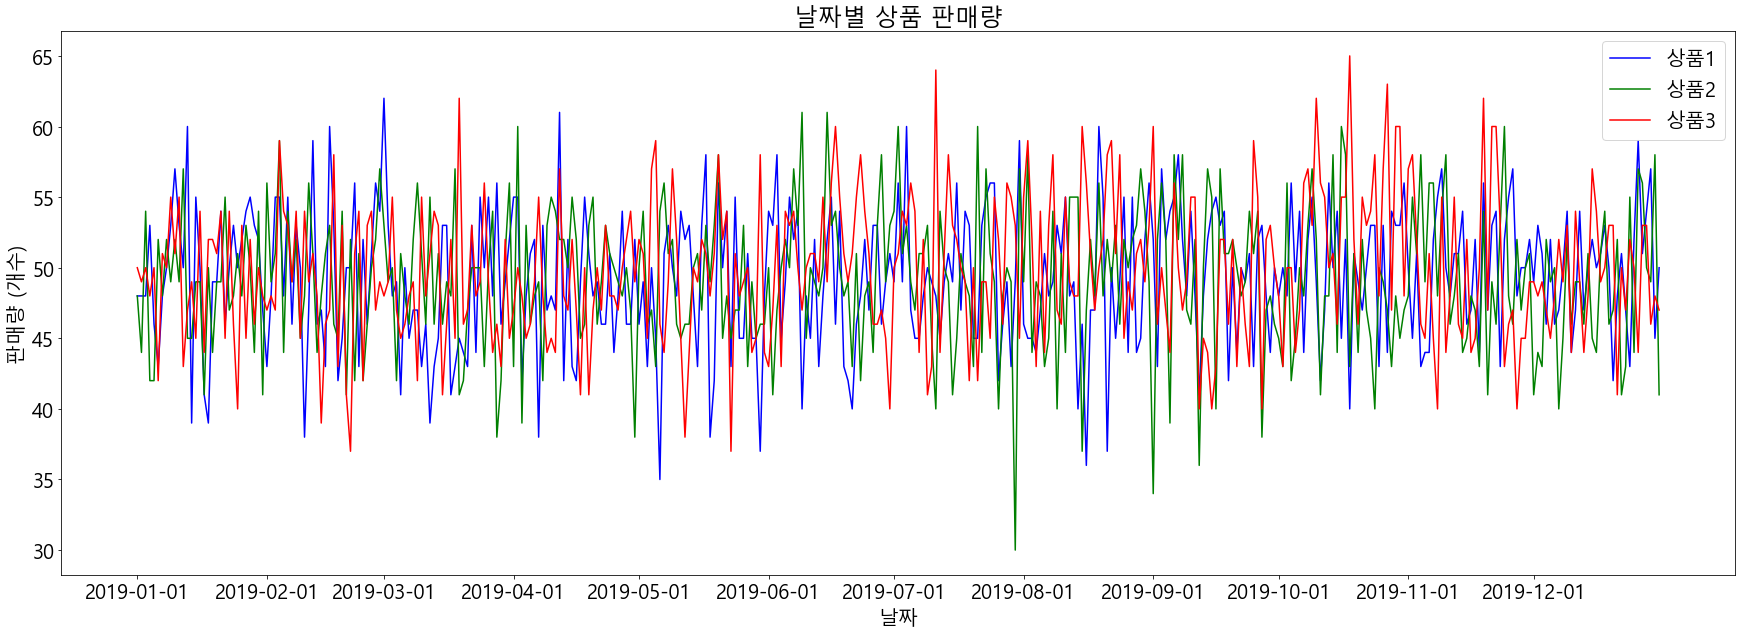

In [6]:
# 그래프 기본 설정
plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")

# cumsum : 누적합
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
plt.xticks(xtick_range, df['날짜'].loc[xtick_range]) 

plt.plot(df['날짜'], df['상품1'], label = '상품1', color = 'b')
plt.plot(df['날짜'], df['상품2'], label = '상품2', color = 'g')
plt.plot(df['날짜'], df['상품3'], label = '상품3', color = 'r')

plt.legend()

##### DataFrame으로 그리기

([<matplotlib.axis.XTick at 0x1bc89bbcc10>,
 <a list of 12 Text xticklabel objects>)

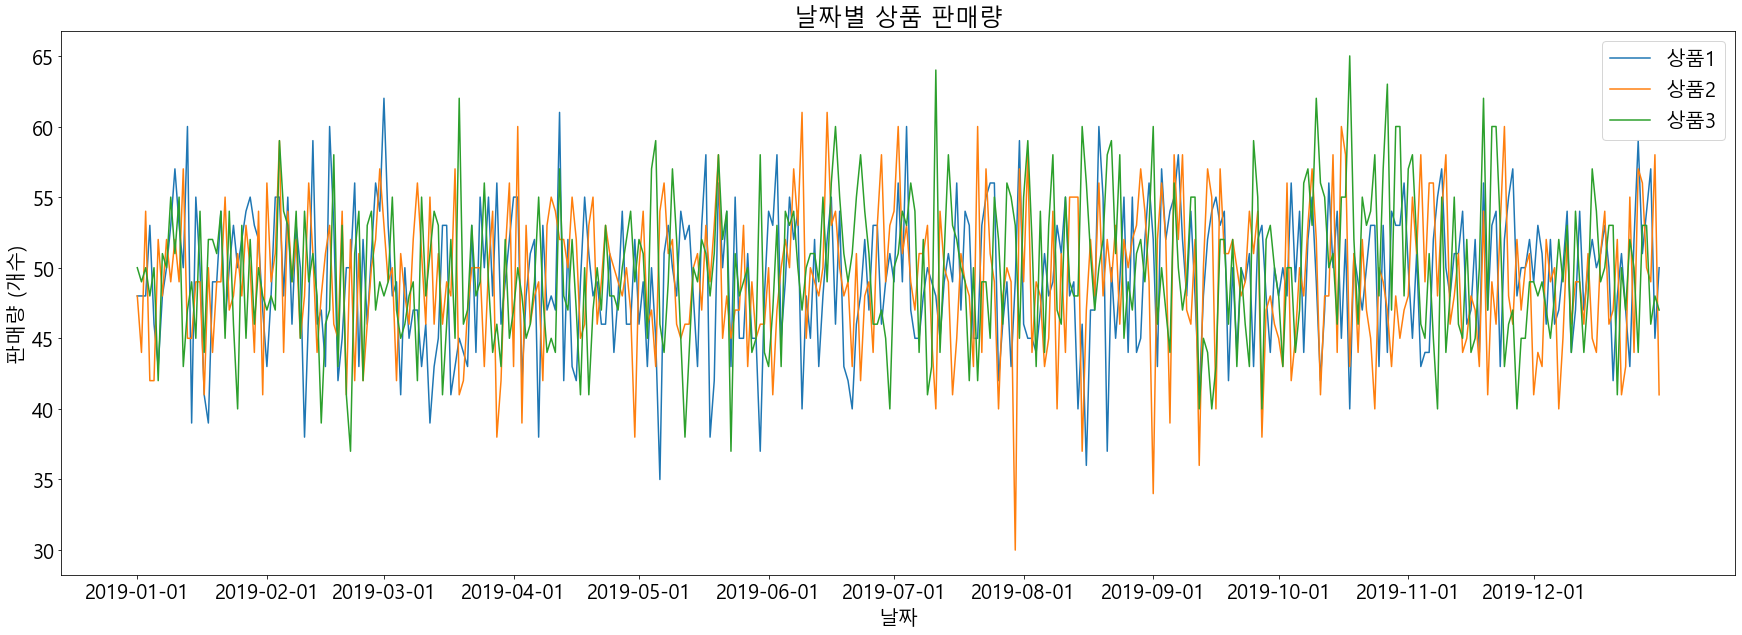

In [7]:
xtick_range = np.cumsum([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]) # 월별 일 수 누적을 통한 매월 1일 인덱스 정의 (12월 제외)
df.plot(kind = 'line', x = '날짜', y = ['상품1', '상품2', '상품3'])

plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(xtick_range, df['날짜'].loc[xtick_range])

# dataframe으로 그리면 한줄이면 그리지만 설정하는데는 pyplot이 편하다 

##### groupby를 이용한 그래프 그리기

In [8]:
df['날짜'].head()

0    2019-01-01
1    2019-01-02
2    2019-01-03
3    2019-01-04
4    2019-01-05
Name: 날짜, dtype: object

In [9]:
df['날짜'].str.split('-', expand = True).head()

,0,1,2
0,2019,01,01
1,2019,01,02
2,2019,01,03
3,2019,01,04
4,2019,01,05


In [10]:
df['월'] = df['날짜'].str.split('-', expand = True).iloc[:, 1]

In [11]:
df.head()

,날짜,상품1,상품2,상품3,월
0,2019-01-01,48,48,50,01
1,2019-01-02,48,44,49,01
2,2019-01-03,48,54,50,01
3,2019-01-04,53,42,48,01
4,2019-01-05,46,42,50,01


([<matplotlib.axis.XTick at 0x1bc89ec6ac0>,
 <a list of 12 Text xticklabel objects>)

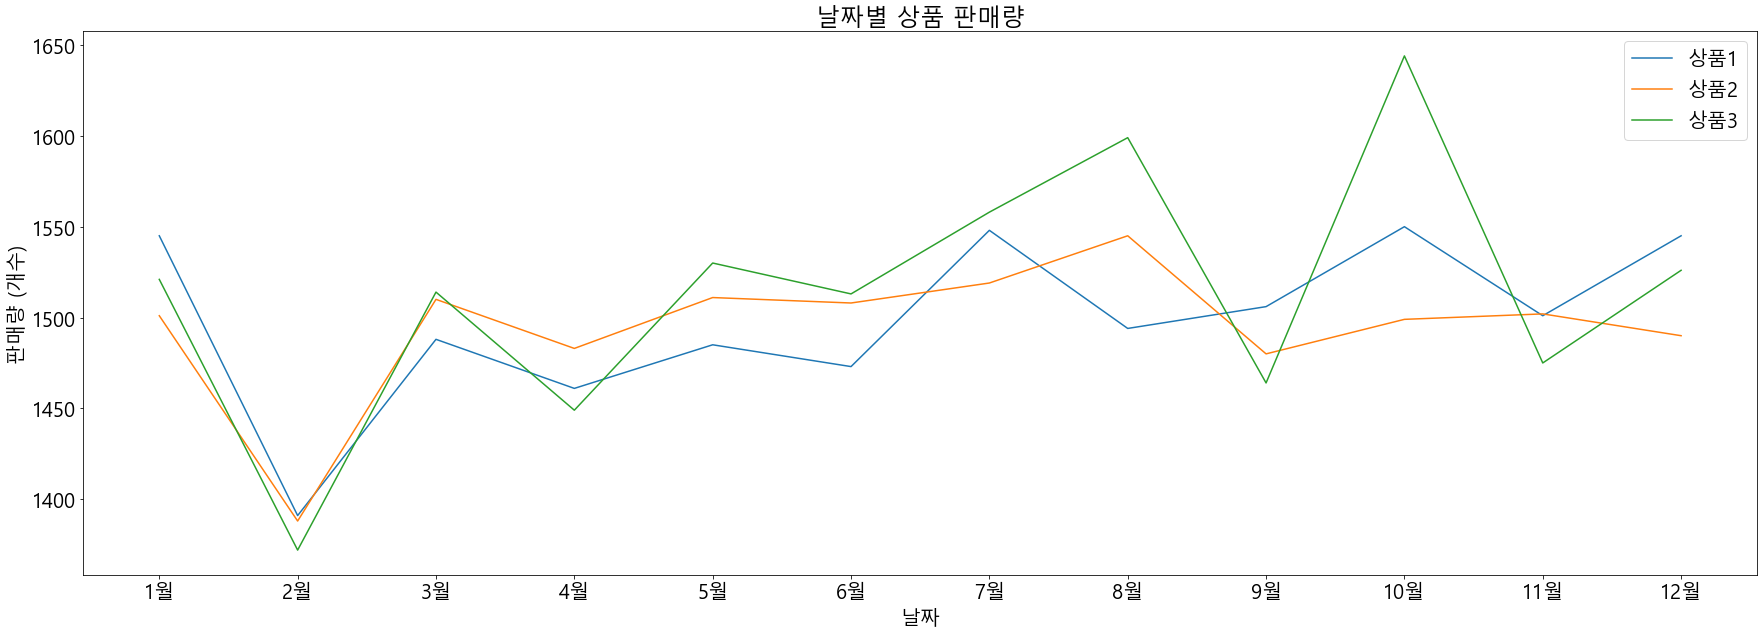

In [12]:
df.groupby('월')[['상품1', '상품2', '상품3']].sum().plot(kind = 'line') 
# 월이 인덱스
# default를 썼으므로, 인덱스가 x축으로 모든 컬럼이 y축으로 들어감
plt.title("날짜별 상품 판매량")
plt.xlabel("날짜")
plt.ylabel("판매량 (개수)")
plt.xticks(range(12), [str(i + 1) + '월' for i in range(12)])

### 산점도

In [15]:
df = pd.read_csv('./데이터/판매실적통합본.csv', encoding='euc-kr')
df.head()

,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [16]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (40, 15)

In [17]:
# 년도 - 분기를 잇는 새로운 변수 생성
df['분기'] = df['년도(year)'].astype(str) + '-' + df['분기(4)'].astype(str)
df['분기'].head()

0    2016-1분기
1    2016-1분기
2    2016-1분기
3    2016-1분기
4    2016-1분기
Name: 분기, dtype: object

In [18]:
grouped_df = df.groupby(['분기', '대리점'], as_index = False)['수량'].sum()
# as_index = False : 인덱스로 사용 안함
grouped_df

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


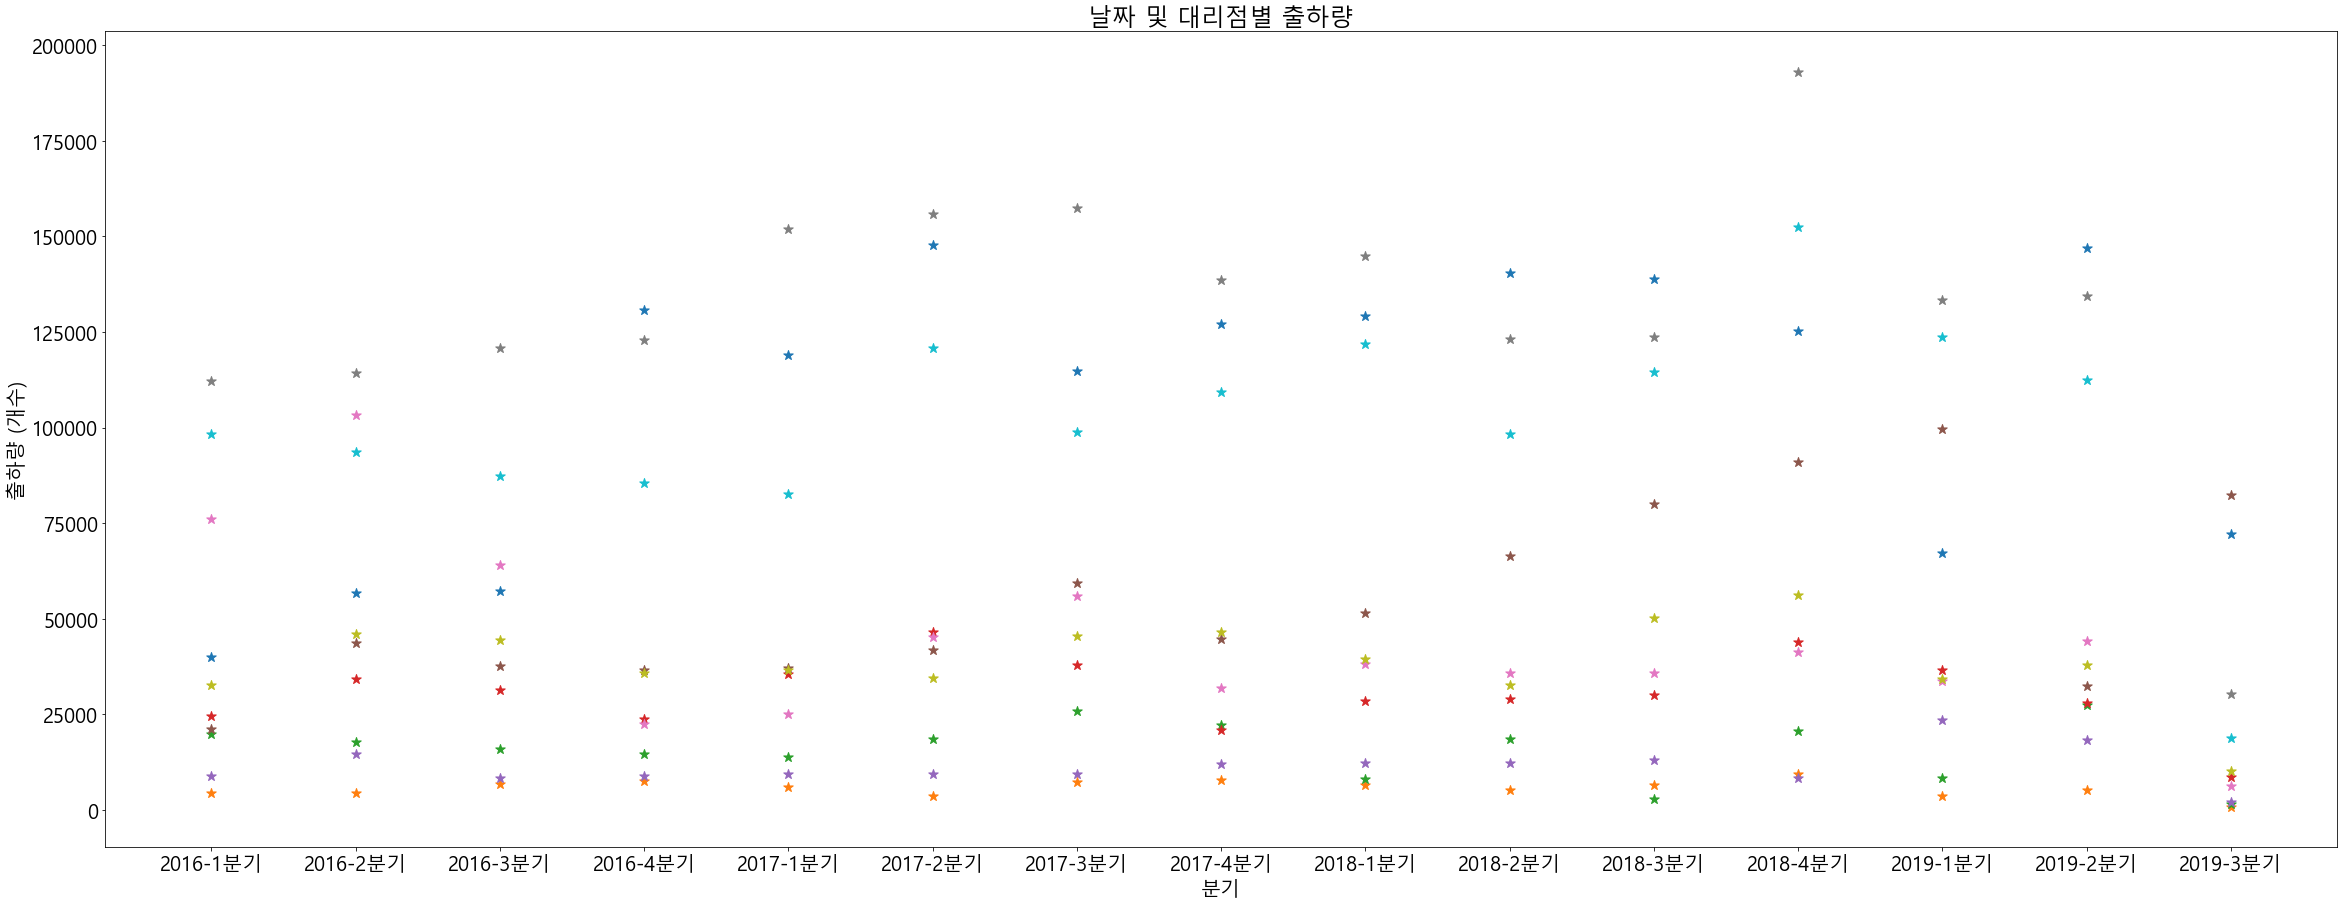

In [19]:
# 그래프 기본 설정
plt.title("날짜 및 대리점별 출하량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()
plt.xticks(xtick_range, xtick_label)

for agent in grouped_df['대리점'].unique():
    cond = grouped_df['대리점'] == agent
    plt.scatter(grouped_df.loc[cond]['분기'], grouped_df.loc[cond]['수량'], s = 100, marker = '*')


##### Dataframe으로 그리기

In [21]:
grouped_df.head() 
# 대리점별로 데이터를 나누거나, pivot을 해야만 df.plot을 이용하기 적합해짐

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010


In [22]:
pivot_df = pd.pivot_table(data = grouped_df, values = '수량', index = '분기', columns = '대리점', aggfunc = 'sum')
pivot_df = pivot_df.add_suffix("_출하량") # 대리점명이 전부 컬럼으로 되기 때문에, suffix를 추가시킴

pivot_df

대리점,대리점 1_출하량,대리점 10_출하량,대리점 2_출하량,대리점 3_출하량,대리점 4_출하량,대리점 5_출하량,대리점 6_출하량,대리점 7_출하량,대리점 8_출하량,대리점 9_출하량
분기,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569
2017-2분기,147784,3780,18633,46604,9357,41749,45136,155935,34654,120782
2017-3분기,114819,7356,25919,37974,9397,59254,56074,157376,45479,98911
2017-4분기,126994,7853,22245,21024,11952,44728,31915,138685,46461,109366
2018-1분기,129271,6554,8176,28597,12280,51422,38133,144976,39479,121972


In [23]:
pivot_df['분기'] = list(range(len(pivot_df))) 
# x축에 쓰기 위해 임의의 변수를 생성함
pivot_df['분기'].head()
# 분기를 x값을로 줄 때 숫자값이 아니라 제대로 안될 수가 있음 그래서 임의의 수를 넣어줌

분기
2016-1분기    0
2016-2분기    1
2016-3분기    2
2016-4분기    3
2017-1분기    4
Name: 분기, dtype: int64

([<matplotlib.axis.XTick at 0x1bc8b251ee0>,
 <a list of 15 Text xticklabel objects>)

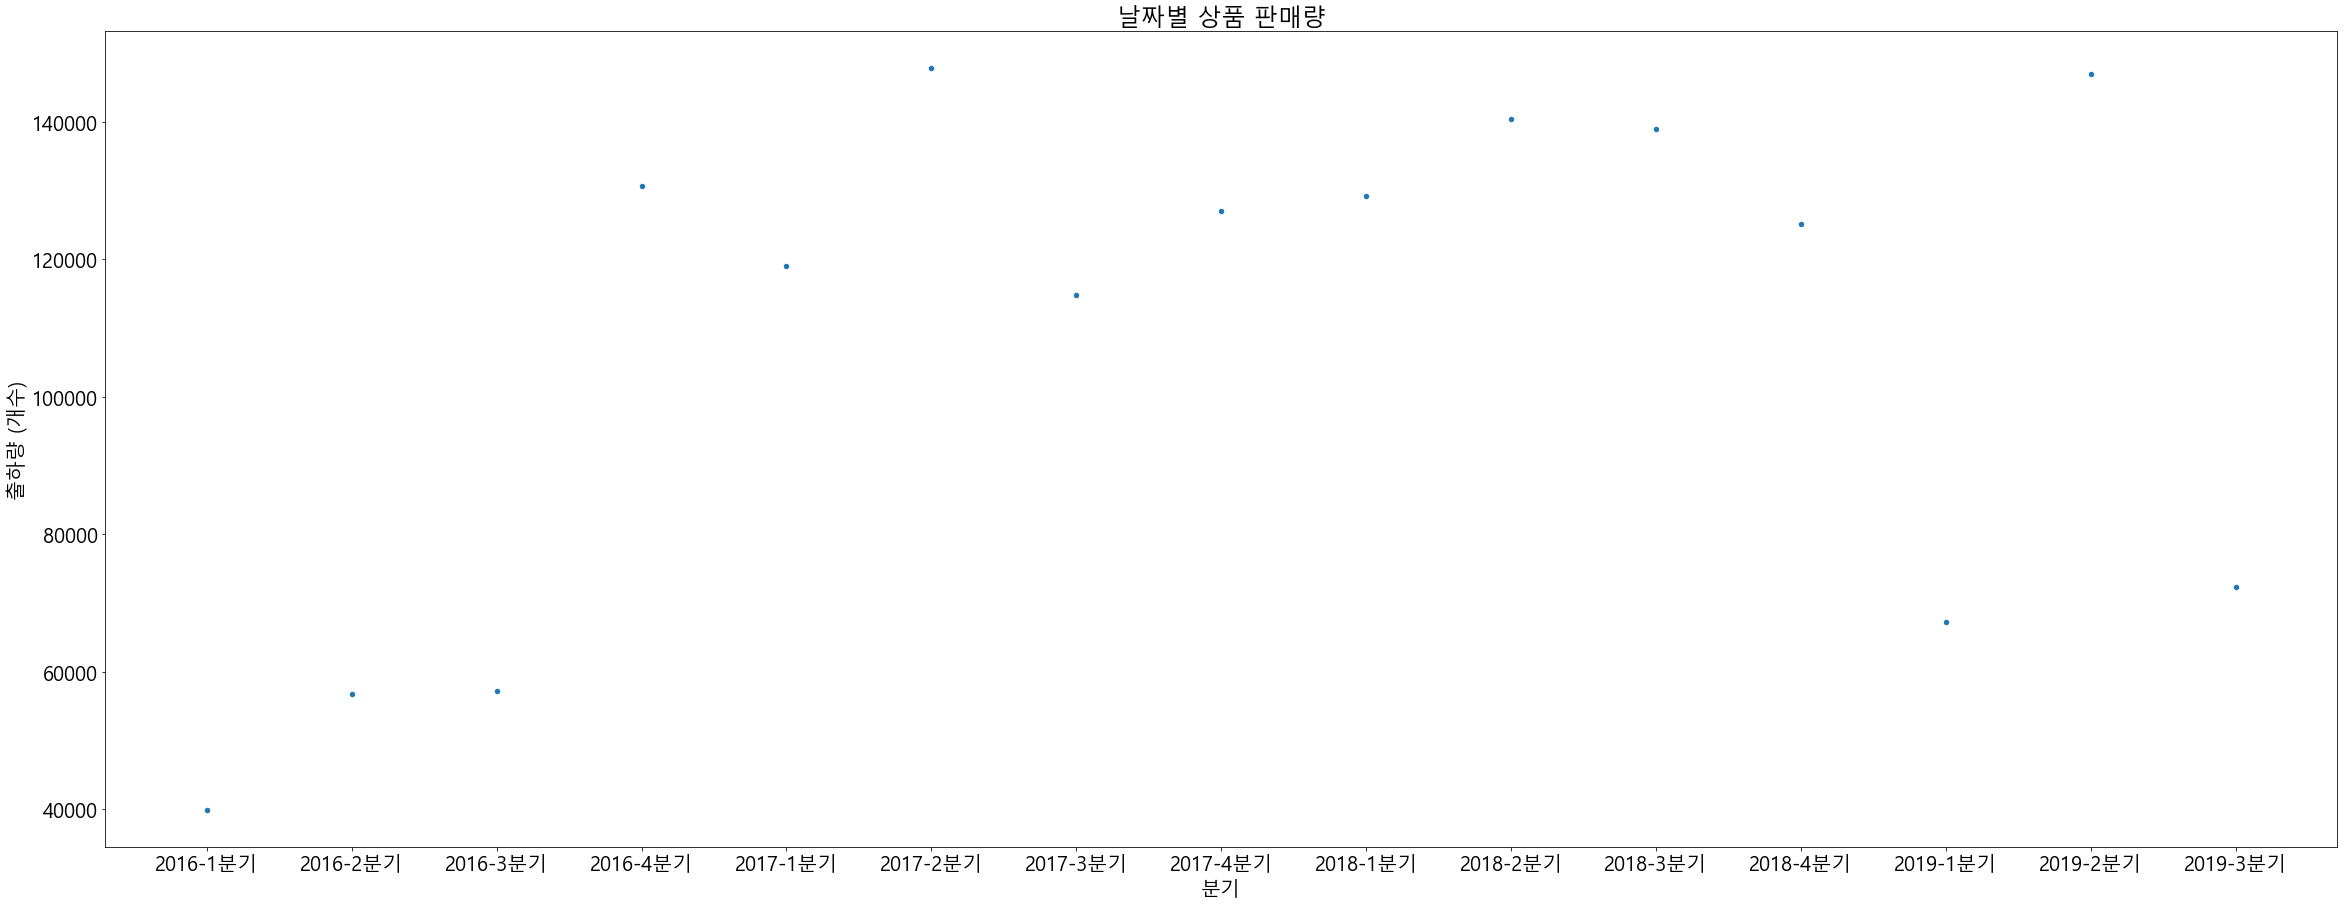

In [24]:
# 그래프 기본 설정
pivot_df.plot(kind = 'scatter', x = '분기', y = '대리점 1_출하량')
plt.title("날짜별 상품 판매량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()

plt.xticks(xtick_range, xtick_label)